## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
base_path = r'..\Dataset'

gen_path_normal = os.path.join(base_path, r'Generated\normal.npy')
gen_path_patient = os.path.join(base_path, r'Generated\patient.npy')

real_path_normal = os.path.join(base_path, r'Real\normal_cls.npy')
real_path_patient = os.path.join(base_path, r'Real\patient_cls.npy')

gen_path_normal,gen_path_patient,real_path_normal,real_path_patient,

('..\\Dataset\\Generated\\normal.npy',
 '..\\Dataset\\Generated\\patient.npy',
 '..\\Dataset\\Real\\normal_cls.npy',
 '..\\Dataset\\Real\\patient_cls.npy')

In [3]:
def higuchi_fd(sig, kmax):
    """
    Compute Higuchi Fractal Dimension of a time series.

    Parameters:
        sig : numpy array
            1-D real-valued time series signal.
        kmax : int
            Maximum delay value.

    Returns:
        float
            Higuchi Fractal Dimension.
    """
    n = len(sig)
    k_vals = np.arange(1, kmax + 1)
    lk = np.zeros(kmax)
    for k in k_vals:
        lm_sum = 0
        for m in range(k):
            num_windows = int(np.floor((n - m) / k))
            temp_sum = 0
            for i in range(num_windows):
                start_index = i * k + m
                end_index = start_index + k
                temp_sum += np.abs(sig[start_index:end_index].mean())
            lm_sum += (1 / (num_windows * k)) * temp_sum
        lk[k - 1] = (lm_sum * (n / k)**2) / ((n - 1) / k)
    return np.log(lk).sum() / np.log(np.divide(n, k_vals)).sum()

In [4]:
# Function to compute Shannon Entropy
def shannonentropy(sig, base=np.exp(1)):
    hist, _ = np.histogram(sig, bins='auto', density=True)
    hist = hist[hist > 0]
    entropy = -np.sum(hist * np.log(hist) / np.log(base))
    return entropy

In [5]:
# Function to compute Katz Fractal Dimension
def katz_fd(sig):
    d = np.abs(np.diff(sig)).sum()
    N = len(sig) - 1
    L = np.hypot(np.diff(sig), 1).sum()
    katz_dim = np.log10(N) / (np.log10(d / L) + np.log10(N))
    return katz_dim

In [6]:
from tqdm import tqdm

def create_dataset(file_path: str, dataset: list, func, classification:int, **kwargs):
    control = np.load(file_path)
    for signal in tqdm(control):
        partial_signal = []
        for channel in signal:
            partial_signal.append(func(channel, **kwargs))
        partial_signal.append(classification)
        partial_signal
        dataset.append(partial_signal)
    return dataset

In [7]:
#For classification

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print(p)
  print("Training Accuracy: " + str(accuracy_score(train_preds, train_labels)))
  print("Training Precision: " + str(precision_score(train_preds, train_labels)))
  print("Training Recall: " + str(recall_score(train_preds, train_labels)))
  print("Training F1: " + str(f1_score(train_preds, train_labels)))

  print("Test Accuracy: " + str(accuracy_score(test_preds, test_labels)))
  print("Test Precision: " + str(precision_score(test_preds, test_labels)))
  print("Test Recall: " + str(recall_score(test_preds, test_labels)))
  print("Test F1: " + str(f1_score(test_preds, test_labels)))

## Higuchi

***To use machine learning models with the actual data***

In [8]:
use_existing = False

In [9]:



if not use_existing:
    dataset_hfd = []
    create_dataset(real_path_patient, dataset_hfd, higuchi_fd, 1, kmax=6)
    create_dataset(real_path_normal, dataset_hfd, higuchi_fd, 0, kmax=6)

    dataset_hfd = np.asarray(dataset_hfd)
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])
    # np.save(r'training_data_MLProject\higuchi_real_only',dataset_hfd)
else:
    dataset_hfd = np.load(r'training_data_MLProject\higuchi_real_only.npy')
    print("Dataset shape:", dataset_hfd.shape)
    print(dataset_hfd[0])


100%|██████████| 99/99 [00:13<00:00,  7.43it/s]

Dataset shape: (199, 20)
[0.71001617 0.61098283 0.56392274 0.570736   0.51022778 0.57786614
 0.46335746 0.51781175 0.71271995 0.57837615 0.54883396 0.58417097
 0.51252851 0.55389208 0.46388468 0.49626271 0.60208266 0.60870427
 0.56441713 1.        ]


**Generated Data Higuchi**

In [10]:
use_existing = False

In [11]:
generated_hfd = []
create_dataset(gen_path_patient, generated_hfd, higuchi_fd, 1, kmax=6)
create_dataset(gen_path_normal, generated_hfd, higuchi_fd, 0, kmax=6)


generated_hfd = np.asarray(generated_hfd)
print(generated_hfd[0])

100%|██████████| 2000/2000 [06:37<00:00,  5.03it/s]

[0.49714706 0.48225845 0.51650397 0.5510158  0.51605473 0.43553665
 0.4157246  0.46639178 0.47133721 0.47948108 0.48215609 0.52098883
 0.52801783 0.43889118 0.39363067 0.4360513  0.45135091 0.49797305
 0.47925425 1.        ]


In [12]:
X = dataset_hfd[:, :-1]
y = dataset_hfd[:, -1]

X_test_hfd, y_test_hfd = X, y

In [13]:
X = generated_hfd[:, :-1]
y = generated_hfd[:, -1]

X_train_hfd, y_train_hfd = X, y

In [14]:
X_train_hfd.shape, X_test_hfd.shape, y_train_hfd.shape, y_test_hfd.shape

((4000, 19), (199, 19), (4000,), (199,))

### Logistic Regression

In [15]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
# lr_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(lr_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

LogisticRegression()
Training Accuracy: 0.819
Training Precision: 0.821
Training Recall: 0.8177290836653387
Training F1: 0.8193612774451098
Test Accuracy: 0.7135678391959799
Test Precision: 0.77
Test Recall: 0.6936936936936937
Test F1: 0.7298578199052133


### Random Forest

In [16]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
# rf_classifier.fit(X_train_hfd, y_train_hfd)

fit_and_print(rf_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.89375
Training Precision: 0.93
Training Recall: 0.8671328671328671
Training F1: 0.8974668275030157
Test Accuracy: 0.6532663316582915
Test Precision: 0.78
Test Recall: 0.624
Test F1: 0.6933333333333334


In [17]:
rf_classifier.feature_importances_

array([0.00974902, 0.01217106, 0.05851506, 0.17933716, 0.06962682,
       0.01269013, 0.01502239, 0.12583971, 0.05707378, 0.00430615,
       0.08270741, 0.07996237, 0.06047254, 0.01527024, 0.06612733,
       0.08046993, 0.02809547, 0.02487517, 0.01768826])

### Decision Tree

In [18]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(dt_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6180904522613065
Test Precision: 0.62
Test Recall: 0.62
Test F1: 0.62


### Naive Bayes

In [19]:
# Initialize the Naïve Bayes Classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
# nb_classifier.fit(X_train_hfd, y_train_hfd)

# Evaluate the classifier
fit_and_print(nb_classifier, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

GaussianNB()
Training Accuracy: 0.686
Training Precision: 0.8035
Training Recall: 0.6506072874493927
Training F1: 0.7190156599552573
Test Accuracy: 0.6884422110552764
Test Precision: 0.85
Test Recall: 0.6439393939393939
Test F1: 0.7327586206896551


### SVM

In [20]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(poly_kernel_svm_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.98625
Training Precision: 0.989
Training Recall: 0.9835902536051716
Training F1: 0.9862877088007979
Test Accuracy: 0.7286432160804021
Test Precision: 0.71
Test Recall: 0.7395833333333334
Test F1: 0.7244897959183674


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = dt_classifier.predict(X_test_hfd)
conf_mat = confusion_matrix(y_test_hfd, y_pred)

In [22]:
print(conf_mat)

[[61 38]
 [38 62]]


In [23]:
y_test_hfd

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

***SVM - using Regularization***

In [24]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.97725
Training Precision: 0.98
Training Recall: 0.9746394828443561
Training F1: 0.9773123909249564
Test Accuracy: 0.7336683417085427
Test Precision: 0.75
Test Recall: 0.7281553398058253
Test F1: 0.7389162561576355


In [25]:
# Define the pipeline with regularization
poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(poly_kernel_svm_clf_regularized2, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.98175
Training Precision: 0.985
Training Recall: 0.9786388474913065
Training F1: 0.9818091203588338
Test Accuracy: 0.7286432160804021
Test Precision: 0.72
Test Recall: 0.7346938775510204
Test F1: 0.7272727272727273


### K Nearest Neighbors

In [26]:
knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(knn_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.982
Training Precision: 0.988
Training Recall: 0.9762845849802372
Training F1: 0.9821073558648111
Test Accuracy: 0.6834170854271356
Test Precision: 0.77
Test Recall: 0.6581196581196581
Test F1: 0.7096774193548387


### Ensemble

In [27]:
#should update all the models here
voting_clf = VotingClassifier(
    estimators=[('lr', lr_classifier),('rf', rf_classifier), ('dt',dt_classifier), ('nb', nb_classifier), ('svm', poly_kernel_svm_clf), ('svc', poly_kernel_svm_clf_regularized), ('svc2', poly_kernel_svm_clf_regularized2), ('knn', knn_clf)],
    voting='soft')

fit_and_print(voting_clf, X_train_hfd, y_train_hfd, X_test_hfd, y_test_hfd)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [28]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
lr_probs = lr_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_lr, tpr_lr, _ = roc_curve(y_test_hfd, lr_probs)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)



# Get predicted probabilities for the positive class
rf_probs = rf_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_rf, tpr_rf, _ = roc_curve(y_test_hfd, rf_probs)

# Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)


# Get predicted probabilities for the positive class
dt_probs = dt_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_dt, tpr_dt, _ = roc_curve(y_test_hfd, dt_probs)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)



# Get predicted probabilities for the positive class
nb_probs = nb_classifier.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_nb, tpr_nb, _ = roc_curve(y_test_hfd, nb_probs)

# Calculate AUC
roc_auc_nb = auc(fpr_nb, tpr_nb)



# Get predicted probabilities for the positive class
svm_probs = poly_kernel_svm_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm, tpr_svm, _ = roc_curve(y_test_hfd, svm_probs)

# Calculate AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)




# Get predicted probabilities for the positive class
svm_probs2 = poly_kernel_svm_clf_regularized.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm2, tpr_svm2, _ = roc_curve(y_test_hfd, svm_probs2)

# Calculate AUC
roc_auc_svm2 = auc(fpr_svm2, tpr_svm2)




# Get predicted probabilities for the positive class
svm_probs3 = poly_kernel_svm_clf_regularized2.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_svm3, tpr_svm3, _ = roc_curve(y_test_hfd, svm_probs3)

# Calculate AUC
roc_auc_svm3 = auc(fpr_svm3, tpr_svm3)



# Get predicted probabilities for the positive class
knn_probs = knn_clf.predict_proba(X_test_hfd)[:, 1]

# Calculate false positive rate and true positive rate
fpr_knn, tpr_knn, _ = roc_curve(y_test_hfd, knn_probs)

# Calculate AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)



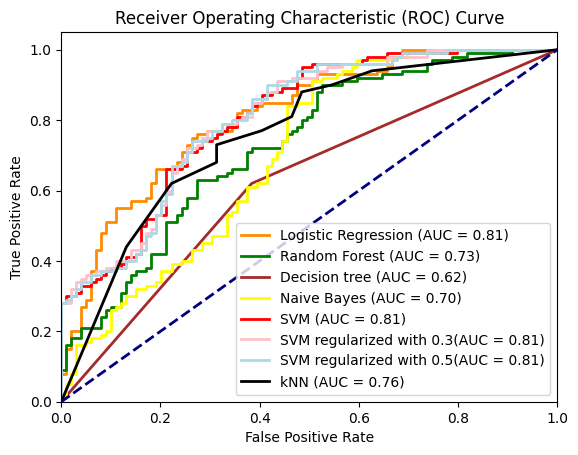

In [29]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='brown', lw=2, label='Decision tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_nb, tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_svm2, tpr_svm2, color='pink', lw=2, label='SVM regularized with 0.3(AUC = %0.2f)' % roc_auc_svm2)
plt.plot(fpr_svm3, tpr_svm3, color='lightblue', lw=2, label='SVM regularized with 0.5(AUC = %0.2f)' % roc_auc_svm3)
plt.plot(fpr_knn, tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ***Entropy***

**Real Data**

In [30]:

dataset_ent = []
create_dataset(real_path_patient, dataset_ent, shannonentropy, 1)
create_dataset(real_path_normal, dataset_ent, shannonentropy, 0)


dataset_ent = np.asarray(dataset_ent)
print(dataset_ent[0], '\n', dataset_ent.shape)
# np.save(r'training_data_MLProject\ent_real_only.npy', dataset_ent)



100%|██████████| 99/99 [00:00<00:00, 563.29it/s]

[  1.16277228  -7.1303388  -14.64062007 -13.14312842 -26.33111495
 -14.23590135 -52.81113963 -27.54122516   1.28634575 -12.58210755
 -17.96553375 -11.24755785 -24.37974699 -20.98237618 -66.35449394
 -35.11989856  -7.3991824   -7.54366634 -13.55379844   1.        ] 
 (199, 20)


**Generated Data**

In [31]:
use_existing = False

In [32]:

generated_ent = []
create_dataset(gen_path_patient, generated_ent, shannonentropy, 1)
create_dataset(gen_path_normal, generated_ent, shannonentropy, 0)


generated_ent = np.asarray(generated_ent)
print(generated_ent[0], '\n', generated_ent.shape)




100%|██████████| 2000/2000 [00:03<00:00, 557.04it/s]

[ -35.6352836   -35.24811721  -32.14674221  -20.84896535  -28.77618016
  -64.24564347  -56.68498002  -40.37140101  -37.15061089  -43.04367895
  -37.40067779  -34.12596918  -38.46773775  -96.61661383 -134.8228983
  -87.40279103  -74.07358781  -42.29848196  -38.87524675    1.        ] 
 (4000, 20)


In [33]:
# # Extract features (X) and output variable (y)
# X1 = dataset_ent[:, :-1]
# y1 = dataset_ent[:, -1]

# # Split the data into training and testing sets
# X_train_ent, X_test_ent = X1[train_indices], X1[test_indices]
# y_train_ent, y_test_ent = y1[train_indices], y1[test_indices]
X_train_ent, y_train_ent = generated_ent[:, :-1], generated_ent[:, -1]
X_test_ent, y_test_ent = dataset_ent[:, :-1], dataset_ent[:, -1]

In [34]:
X_train_ent.shape, y_train_ent.shape, X_test_ent.shape, y_test_ent.shape

((4000, 19), (4000,), (199, 19), (199,))

### Random Forest

In [35]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.8975
Training Precision: 0.9175
Training Recall: 0.8822115384615384
Training F1: 0.8995098039215687
Test Accuracy: 0.678391959798995
Test Precision: 0.72
Test Recall: 0.6666666666666666
Test F1: 0.6923076923076923


**Feature Importances**

In [36]:
ent_rf_classifier.feature_importances_

array([0.01487354, 0.01792893, 0.0722195 , 0.1429732 , 0.10479917,
       0.01135223, 0.01131185, 0.05794237, 0.09643884, 0.01792799,
       0.11118662, 0.09782455, 0.04679852, 0.02154168, 0.04150467,
       0.05142629, 0.02139501, 0.03626268, 0.02429235])

### Feature Selection

In [37]:
print(features_importance := ent_rf_classifier.feature_importances_)

# Threshold
threshold = 0.0

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

[0.01487354 0.01792893 0.0722195  0.1429732  0.10479917 0.01135223
 0.01131185 0.05794237 0.09643884 0.01792799 0.11118662 0.09782455
 0.04679852 0.02154168 0.04150467 0.05142629 0.02139501 0.03626268
 0.02429235]


In [38]:
print(indexes)
# X_train_ent, X_test_ent = X_train_ent[:, indexes], X_test_ent[:, indexes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


### Random Forest Classifier

In [39]:
# Initialize the Random Forest Classifier
ent_rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=5)

# Train the classifier on the training data
# ent_rf_classifier.fit(X_train_ent, y_train_ent)

fit_and_print(ent_rf_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

RandomForestClassifier(max_depth=5, n_estimators=150)
Training Accuracy: 0.8965
Training Precision: 0.9185
Training Recall: 0.8797892720306514
Training F1: 0.8987279843444227
Test Accuracy: 0.6834170854271356
Test Precision: 0.73
Test Recall: 0.6697247706422018
Test F1: 0.6985645933014354


### Logistic Regression

In [40]:
# Initialize the Logistic Regression Classifier
ent_lr_classifier = LogisticRegression()

# Train the classifier on the training data
# ent_lr_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_lr_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

LogisticRegression()
Training Accuracy: 0.88275
Training Precision: 0.8875
Training Recall: 0.8791480931154037
Training F1: 0.8833043045533715
Test Accuracy: 0.7085427135678392
Test Precision: 0.73
Test Recall: 0.7019230769230769
Test F1: 0.7156862745098039


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [41]:
# Initialize the Decision Tree Classifier
ent_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# ent_dt_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_dt_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.5829145728643216
Test Precision: 0.51
Test Recall: 0.6
Test F1: 0.5513513513513514


### Naive Bayes

In [42]:
# Initialize the Naïve Bayes Classifier
ent_nb_classifier = GaussianNB()

# Train the classifier on the training data
# ent_nb_classifier.fit(X_train_ent, y_train_ent)

# Evaluate the classifier
fit_and_print(ent_nb_classifier, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

GaussianNB()
Training Accuracy: 0.6225
Training Precision: 0.8835
Training Recall: 0.5804862023653088
Training F1: 0.7006344171292624
Test Accuracy: 0.678391959798995
Test Precision: 0.91
Test Recall: 0.6232876712328768
Test F1: 0.7398373983739838


### SVM

In [43]:
ent_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(ent_poly_kernel_svm_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.9465
Training Precision: 0.954
Training Recall: 0.9399014778325123
Training F1: 0.9468982630272953
Test Accuracy: 0.678391959798995
Test Precision: 0.69
Test Recall: 0.6764705882352942
Test F1: 0.6831683168316832


In [44]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.93375
Training Precision: 0.9415
Training Recall: 0.9271294928606598
Training F1: 0.9342594889605557
Test Accuracy: 0.678391959798995
Test Precision: 0.69
Test Recall: 0.6764705882352942
Test F1: 0.6831683168316832


In [45]:
# Define the pipeline with regularization
ent_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(ent_poly_kernel_svm_clf_regularized2, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.94025
Training Precision: 0.947
Training Recall: 0.9343857918105575
Training F1: 0.9406506083933449
Test Accuracy: 0.6733668341708543
Test Precision: 0.69
Test Recall: 0.6699029126213593
Test F1: 0.6798029556650246


### K Nearest Neighbors

In [46]:
ent_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=7))
    ])

fit_and_print(ent_knn_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=7))])
Training Accuracy: 0.9465
Training Precision: 0.9405
Training Recall: 0.9519230769230769
Training F1: 0.9461770623742455
Test Accuracy: 0.6532663316582915
Test Precision: 0.7
Test Recall: 0.6422018348623854
Test F1: 0.6698564593301436


In [47]:
#should add all the models reference here
ent_voting_clf = VotingClassifier(
    estimators=[('lr', ent_lr_classifier),('rf', ent_rf_classifier), ('dt',ent_dt_classifier), ('nb', ent_nb_classifier),('svm', ent_poly_kernel_svm_clf), ('svc', ent_poly_kernel_svm_clf_regularized), ('svc2', ent_poly_kernel_svm_clf_regularized2), ('knn', ent_knn_clf)],
    voting='soft')

fit_and_print(ent_voting_clf, X_train_ent, y_train_ent, X_test_ent, y_test_ent)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=150)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [48]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
ent_lr_probs = ent_lr_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_lr, ent_tpr_lr, _ = roc_curve(y_test_ent, ent_lr_probs)

# Calculate AUC
ent_roc_auc_lr = auc(ent_fpr_lr, ent_tpr_lr)


# Get predicted probabilities for the positive class
ent_rf_probs = ent_rf_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_rf, ent_tpr_rf, _ = roc_curve(y_test_ent, ent_rf_probs)

# Calculate AUC
ent_roc_auc_rf = auc(ent_fpr_rf, ent_tpr_rf)


# Get predicted probabilities for the positive class
ent_dt_probs = ent_dt_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_dt, ent_tpr_dt, _ = roc_curve(y_test_ent, ent_dt_probs)

# Calculate AUC
ent_roc_auc_dt = auc(ent_fpr_dt, ent_tpr_dt)


# Get predicted probabilities for the positive class
ent_nb_probs = ent_nb_classifier.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_nb, ent_tpr_nb, _ = roc_curve(y_test_ent, ent_nb_probs)

# Calculate AUC
ent_roc_auc_nb = auc(ent_fpr_nb, ent_tpr_nb)



# Get predicted probabilities for the positive class
ent_svm_probs = ent_poly_kernel_svm_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm, ent_tpr_svm, _ = roc_curve(y_test_ent, ent_svm_probs)

# Calculate AUC
ent_roc_auc_svm = auc(ent_fpr_svm, ent_tpr_svm)




# Get predicted probabilities for the positive class
ent_svm_probs2 = ent_poly_kernel_svm_clf_regularized2.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm2, ent_tpr_svm2, _ = roc_curve(y_test_ent, ent_svm_probs2)

# Calculate AUC
ent_roc_auc_svm2 = auc(ent_fpr_svm2, ent_tpr_svm2)




# Get predicted probabilities for the positive class
ent_svm_probs3 = ent_poly_kernel_svm_clf_regularized.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_svm3, ent_tpr_svm3, _ = roc_curve(y_test_ent, ent_svm_probs3)

# Calculate AUC
ent_roc_auc_svm3 = auc(ent_fpr_svm3, ent_tpr_svm3)



# Get predicted probabilities for the positive class
ent_knn_probs = ent_knn_clf.predict_proba(X_test_ent)[:, 1]

# Calculate false positive rate and true positive rate
ent_fpr_knn, ent_tpr_knn, _ = roc_curve(y_test_ent, ent_knn_probs)

# Calculate AUC
ent_roc_auc_knn = auc(ent_fpr_knn, ent_tpr_knn)


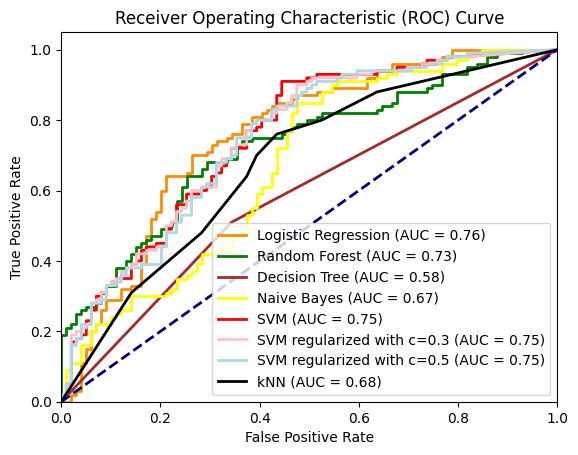

In [49]:
# Plot ROC curve
plt.figure()
plt.plot(ent_fpr_lr, ent_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % ent_roc_auc_lr)
plt.plot(ent_fpr_rf, ent_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % ent_roc_auc_rf)
plt.plot(ent_fpr_dt, ent_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % ent_roc_auc_dt)
plt.plot(ent_fpr_nb, ent_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % ent_roc_auc_nb)
plt.plot(ent_fpr_svm, ent_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % ent_roc_auc_svm)
plt.plot(ent_fpr_svm2, ent_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3 (AUC = %0.2f)' % ent_roc_auc_svm2)
plt.plot(ent_fpr_svm3, ent_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5 (AUC = %0.2f)' % ent_roc_auc_svm3)
plt.plot(ent_fpr_knn, ent_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % ent_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Kats Fractal Dimension

**Real Dataset**

In [50]:
use_existing = False

In [51]:
dataset_kfd = []
create_dataset(real_path_patient, dataset_kfd, katz_fd, 1)
create_dataset(real_path_normal, dataset_kfd, katz_fd, 0)


dataset_kfd = np.asarray(dataset_kfd)
print(dataset_kfd[0], '\n', dataset_kfd.shape) 

100%|██████████| 99/99 [00:00<00:00, 5790.57it/s]

[2.52582536 2.59757456 2.6396319  2.3636792  2.43598268 2.84284195
 3.04719444 2.83008017 2.50978761 2.62324476 2.56010903 2.40286072
 2.21936104 3.03825119 3.42155563 2.63651955 2.40314976 2.41828866
 2.52859551 1.        ] 
 (199, 20)


**Generated Data**

In [52]:
generated_kfd = []
create_dataset(gen_path_patient, generated_kfd, katz_fd, 1)
create_dataset(gen_path_normal, generated_kfd, katz_fd, 0)


generated_kfd = np.asarray(generated_kfd)
print(generated_kfd[0], '\n', generated_kfd.shape)

100%|██████████| 2000/2000 [00:00<00:00, 6018.13it/s]

[2.68360736 2.51742008 2.45723732 2.40145253 2.58419656 2.99842382
 2.98102281 2.75485343 2.7065931  2.69218644 2.6057603  2.62737002
 2.71526789 3.3753747  3.50160256 3.21412674 3.30062528 2.78760419
 2.74115964 1.        ] 
 (4000, 20)


In [53]:
print("Dataset: ", dataset_kfd.min(), dataset_kfd.max(), dataset_kfd.mean(), dataset_kfd.std(), 
      "\nGenerated:", generated_kfd.min(), generated_kfd.max(), generated_kfd.mean(), generated_kfd.std())

Dataset:  0.0 4.251078664050918 2.3613404229533472 0.5929675966664166 
Generated: 0.0 7.4203775623208035 2.410142339384653 0.6305258297383652


In [54]:
X_train_kfd, y_train_kfd = generated_kfd[:, :-1], generated_kfd[:, -1]
X_test_kfd, y_test_kfd = dataset_kfd[:, :-1], dataset_kfd[:, -1]

In [55]:
# X2 = dataset_kfd[:, :-1]
# y2 = dataset_kfd[:, -1]

# num_samples = len(y2)
# train_size = int(0.8 * num_samples)  # 80% for training, 20% for testing

# # Randomly select indices for training and testing
# indices = np.arange(num_samples)
# np.random.shuffle(indices)

# train_indices = indices[:train_size]
# test_indices = indices[train_size:]
# # Extract features (X) and output variable (y)

# # Split the data into training and testing sets
# X_train_kfd, X_test_kfd = X2[train_indices], X2[test_indices]
# y_train_kfd, y_test_kfd = y2[train_indices], y2[test_indices]


### Random Forest 

In [56]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.777
Training Precision: 0.935
Training Recall: 0.7104863221884499
Training F1: 0.8074265975820379
Test Accuracy: 0.6231155778894473
Test Precision: 0.83
Test Recall: 0.5886524822695035
Test F1: 0.6887966804979253


### Feature Selection

In [57]:
print(features_importance := kfd_rf_classifier.feature_importances_)

[0.01402414 0.01585043 0.04308399 0.1727821  0.06912648 0.01549148
 0.03454516 0.0127126  0.05075152 0.03713625 0.1146679  0.19785528
 0.03284607 0.03064507 0.01667831 0.01714602 0.03396844 0.03537248
 0.05531628]


In [58]:
# values = [0.05, 0.2, 0.1, 0.15, -0.3, 0.5, 0.05]

# Threshold
threshold = 0.1

# List comprehension to find indexes where values are greater than the threshold
indexes = [index for index, value in enumerate(features_importance) if value > threshold]

In [59]:
indexes

[3, 10, 11]

In [60]:
# X_train_kfd, X_test_kfd = X_train_kfd[:, indexes], X_test_kfd[:, indexes]

### Random Forest Classifier

In [61]:
# Initialize the Random Forest Classifier
kfd_rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=4)

# Train the classifier on the training data
kfd_rf_classifier.fit(X_train_kfd, y_train_kfd)

fit_and_print(kfd_rf_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

RandomForestClassifier(max_depth=4, n_estimators=200)
Training Accuracy: 0.7715
Training Precision: 0.9335
Training Recall: 0.7050604229607251
Training F1: 0.8033562822719449
Test Accuracy: 0.6180904522613065
Test Precision: 0.84
Test Recall: 0.5833333333333334
Test F1: 0.6885245901639344


### Logistic Regression

In [62]:
# Initialize the Logistic Regression Classifier
kfd_lr_classifier = LogisticRegression()

# Train the classifier on the  training data
kfd_lr_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_lr_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

LogisticRegression()
Training Accuracy: 0.89025
Training Precision: 0.8965
Training Recall: 0.885432098765432
Training F1: 0.8909316770186335
Test Accuracy: 0.6733668341708543
Test Precision: 0.67
Test Recall: 0.6767676767676768
Test F1: 0.6733668341708543


c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

### Decision Tree

In [63]:
# Initialize the Decision Tree Classifier
kfd_dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
# kfd_dt_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_dt_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

DecisionTreeClassifier()
Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1: 1.0
Test Accuracy: 0.6582914572864321
Test Precision: 0.66
Test Recall: 0.66
Test F1: 0.66


### Naive Bayes

In [64]:
# Initialize the Naïve Bayes Classifier
kfd_nb_classifier = GaussianNB()

# Train the classifier on the training data
# kfd_nb_classifier.fit(X_train_kfd, y_train_kfd)

# Evaluate the classifier
fit_and_print(kfd_nb_classifier, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

GaussianNB()
Training Accuracy: 0.6095
Training Precision: 0.8425
Training Recall: 0.5746930422919508
Training F1: 0.6832927818329279
Test Accuracy: 0.6582914572864321
Test Precision: 0.89
Test Recall: 0.6095890410958904
Test F1: 0.7235772357723578


### SVM

In [65]:
kfd_poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=1, probability=True))
    ])

fit_and_print(kfd_poly_kernel_svm_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=1, coef0=3, degree=2, kernel='poly', probability=True))])
Training Accuracy: 0.93975
Training Precision: 0.94
Training Recall: 0.9395302348825587
Training F1: 0.9397650587353161
Test Accuracy: 0.6582914572864321
Test Precision: 0.63
Test Recall: 0.6702127659574468
Test F1: 0.6494845360824743


In [66]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.3, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.3, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.92875
Training Precision: 0.934
Training Recall: 0.9242949035131123
Training F1: 0.9291221089281273
Test Accuracy: 0.6432160804020101
Test Precision: 0.63
Test Recall: 0.6494845360824743
Test F1: 0.6395939086294417


In [67]:
# Define the pipeline with regularization
kfd_poly_kernel_svm_clf_regularized2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=3, C=0.5, probability=True))  # Adjust C value for regularization
])

# Fit and evaluate the model
fit_and_print(kfd_poly_kernel_svm_clf_regularized2, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=0.5, coef0=3, degree=2, kernel='poly',
                     probability=True))])
Training Accuracy: 0.93425
Training Precision: 0.9375
Training Recall: 0.9314456035767511
Training F1: 0.9344629952653875
Test Accuracy: 0.6381909547738693
Test Precision: 0.62
Test Recall: 0.6458333333333334
Test F1: 0.6326530612244898


### K Nearest Neighbors

In [68]:
kfd_knn_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("knn_clf", KNeighborsClassifier(n_neighbors=9))
    ])

fit_and_print(kfd_knn_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn_clf', KNeighborsClassifier(n_neighbors=9))])
Training Accuracy: 0.93075
Training Precision: 0.9255
Training Recall: 0.9353208691258211
Training F1: 0.9303845187232973
Test Accuracy: 0.6130653266331658
Test Precision: 0.72
Test Recall: 0.5950413223140496
Test F1: 0.6515837104072398


### Ensemble

In [69]:
# fill all the models here
kfd_voting_clf = VotingClassifier(
    estimators=[('lr', kfd_lr_classifier),('rf', kfd_rf_classifier), ('dt',kfd_dt_classifier), ('nb', kfd_nb_classifier),('svm', kfd_poly_kernel_svm_clf), ('svc', kfd_poly_kernel_svm_clf_regularized), ('svc2', kfd_poly_kernel_svm_clf_regularized2), ('knn', kfd_knn_clf)],
    voting='soft')

fit_and_print(kfd_voting_clf, X_train_kfd, y_train_kfd, X_test_kfd, y_test_kfd)

c:\Users\wolve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200)),
                             ('dt', DecisionTreeClassifier()),
                             ('nb', GaussianNB()),
                             ('svm',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=1, coef0=3, degree=2,
                                                   kernel='poly',
                                                   probability=True))])),
                             ('svc',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('svm_clf',
                                               SVC(C=0.3, coef0=3, degree=2,
                  

### ROC

In [70]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
kfd_lr_probs = kfd_lr_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_lr, kfd_tpr_lr, _ = roc_curve(y_test_kfd, kfd_lr_probs)

# Calculate AUC
kfd_roc_auc_lr = auc(kfd_fpr_lr, kfd_tpr_lr)



# Get predicted probabilities for the positive class
kfd_rf_probs = kfd_rf_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_rf, kfd_tpr_rf, _ = roc_curve(y_test_kfd, kfd_rf_probs)

# Calculate AUC
kfd_roc_auc_rf = auc(kfd_fpr_rf, kfd_tpr_rf)


# Get predicted probabilities for the positive class
kfd_dt_probs = kfd_dt_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_dt, kfd_tpr_dt, _ = roc_curve(y_test_kfd, kfd_dt_probs)

# Calculate AUC
kfd_roc_auc_dt = auc(kfd_fpr_dt, kfd_tpr_dt)


# Get predicted probabilities for the positive class
kfd_nb_probs = kfd_nb_classifier.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_nb, kfd_tpr_nb, _ = roc_curve(y_test_kfd, kfd_nb_probs)

# Calculate AUC
kfd_roc_auc_nb = auc(kfd_fpr_nb, kfd_tpr_nb)



# Get predicted probabilities for the positive class
kfd_svm_probs = kfd_poly_kernel_svm_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm, kfd_tpr_svm, _ = roc_curve(y_test_kfd, kfd_svm_probs)

# Calculate AUC
kfd_roc_auc_svm = auc(kfd_fpr_svm, kfd_tpr_svm)




# Get predicted probabilities for the positive class
kfd_svm_probs2 = kfd_poly_kernel_svm_clf_regularized.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm2, kfd_tpr_svm2, _ = roc_curve(y_test_kfd, kfd_svm_probs2)

# Calculate AUC
kfd_roc_auc_svm2 = auc(kfd_fpr_svm2, kfd_tpr_svm2)




# Get predicted probabilities for the positive class
kfd_svm_probs3 = kfd_poly_kernel_svm_clf_regularized2.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_svm3, kfd_tpr_svm3, _ = roc_curve(y_test_kfd, kfd_svm_probs3)

# Calculate AUC
kfd_roc_auc_svm3 = auc(kfd_fpr_svm3, kfd_tpr_svm3)



# Get predicted probabilities for the positive class
kfd_knn_probs = kfd_knn_clf.predict_proba(X_test_kfd)[:, 1]

# Calculate false positive rate and true positive rate
kfd_fpr_knn, kfd_tpr_knn, _ = roc_curve(y_test_kfd, kfd_knn_probs)

# Calculate AUC
kfd_roc_auc_knn = auc(kfd_fpr_knn, kfd_tpr_knn)


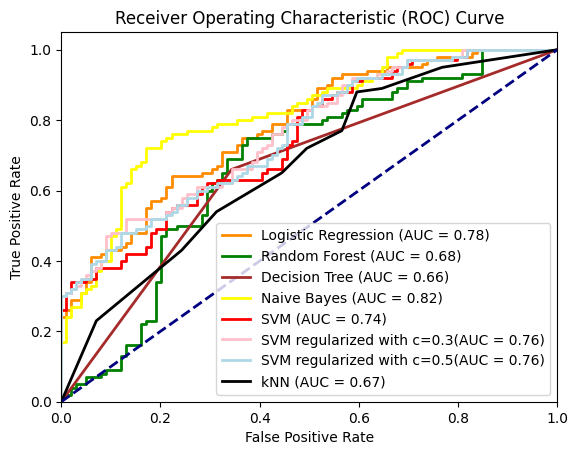

In [71]:
# Plot ROC curve
plt.figure()
plt.plot(kfd_fpr_lr, kfd_tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % kfd_roc_auc_lr)
plt.plot(kfd_fpr_rf, kfd_tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % kfd_roc_auc_rf)
plt.plot(kfd_fpr_dt, kfd_tpr_dt, color='brown', lw=2, label='Decision Tree (AUC = %0.2f)' % kfd_roc_auc_dt)
plt.plot(kfd_fpr_nb, kfd_tpr_nb, color='yellow', lw=2, label='Naive Bayes (AUC = %0.2f)' % kfd_roc_auc_nb)
plt.plot(kfd_fpr_svm, kfd_tpr_svm, color='red', lw=2, label='SVM (AUC = %0.2f)' % kfd_roc_auc_svm)
plt.plot(kfd_fpr_svm2, kfd_tpr_svm2, color='pink', lw=2, label='SVM regularized with c=0.3(AUC = %0.2f)' % kfd_roc_auc_svm2)
plt.plot(kfd_fpr_svm3, kfd_tpr_svm3, color='lightblue', lw=2, label='SVM regularized with c=0.5(AUC = %0.2f)' % kfd_roc_auc_svm3)
plt.plot(kfd_fpr_knn, kfd_tpr_knn, color='black', lw=2, label='kNN (AUC = %0.2f)' % kfd_roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# EEGNet

In [72]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
import os

In [73]:
batch_size = 32

In [74]:
training_data_control_np = np.load(gen_path_normal)
training_data_patient_np = np.load(gen_path_patient)

labels_control = np.zeros(training_data_control_np.shape[0])  # Label for controls is 0
labels_patient = np.ones(training_data_patient_np.shape[0])   # Label for patients is 1


training_data_np = np.concatenate((training_data_control_np,training_data_patient_np), axis=0)
labels_np = np.concatenate((labels_control, labels_patient), axis=0)

data_tensor = torch.Tensor(training_data_np)
labels_tensor = torch.LongTensor(labels_np)  # Use LongTensor for labels

# Since the discriminator expects flat input, flatten the data if necessary
data_tensor = data_tensor.view(data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
dataset = TensorDataset(data_tensor, labels_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [75]:
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)

val_labels_control = np.zeros(real_data_control.shape[0])  # Label for controls is 0
val_labels_patient = np.ones(real_data_patient.shape[0])   # Label for patients is 1

validation_data_np = np.concatenate((real_data_control,real_data_patient), axis=0)
val_labels_np = np.concatenate((val_labels_control, val_labels_patient), axis=0)

validation_data_tensor = torch.Tensor(validation_data_np)
val_tensor = torch.LongTensor(val_labels_np) #, dtype=torch.float32) #.dtype(torch.float) 

# Since the discriminator expects flat input, flatten the data if necessary
validation_data_tensor = validation_data_tensor.view(validation_data_tensor.size(0), 1, 19, 500)  # Reshaping to (batch_size, 9500)

# Create a TensorDataset
validation_dataset = TensorDataset(validation_data_tensor, val_tensor)
val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)


In [76]:
validation_data_np.shape,val_labels_np.shape

((199, 19, 500), (199,))

In [77]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from modules.EEGNET import EEGNetClassifier

test_validity = False

if not test_validity:
    model = EEGNetClassifier().cuda()
else:
    class SimpleNet(nn.Module):
        def __init__(self, input_channels=1, num_classes=1):
            super(SimpleNet, self).__init__()
            self.conv1 = nn.Conv2d(input_channels, 1, kernel_size=3, stride=1, padding=1)
            self.relu = nn.ReLU()
            self.fc = nn.Linear(9500, num_classes)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            # Input x should have shape: (batch_size, input_channels, sequence_length)
            x = self.conv1(x)
            x = self.relu(x)
            # Flatten before fully connected layer
            x = x.view(x.size(0), -1)
            x = self.fc(x)
            x = self.sigmoid(x)
            return x
    model = SimpleNet().cuda()

In [78]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 25 

In [79]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    model.train()
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())

        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")
    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Val Loss: {sum(val_losses)/len(val_losses)} Val Accuracy: {val_accuracy}\033[0m")
            

Epoch 0 Loss: 0.028925281018018723 : 100%|██████████| 125/125 [00:00<00:00, 177.97it/s]


Epoch 0 Training Loss: 0.20158878564089536 Val Loss: 0.003566039526568992 Val Accuracy: 1.0


Epoch 1 Loss: 0.2012089490890503 : 100%|██████████| 125/125 [00:00<00:00, 332.02it/s]   


Epoch 1 Training Loss: 0.02504801334813237 Val Loss: 0.0005390618462115526 Val Accuracy: 1.0


Epoch 2 Loss: 0.007122270297259092 : 100%|██████████| 125/125 [00:00<00:00, 328.73it/s] 


Epoch 2 Training Loss: 0.01719774989504367 Val Loss: 0.00018635617172029533 Val Accuracy: 1.0


Epoch 3 Loss: 0.01720522530376911 : 100%|██████████| 125/125 [00:00<00:00, 326.17it/s] 


Epoch 3 Training Loss: 0.01399234086368233 Val Loss: 8.539934736160961e-05 Val Accuracy: 1.0


Epoch 4 Loss: 0.004065878223627806 : 100%|██████████| 125/125 [00:00<00:00, 331.60it/s] 


Epoch 4 Training Loss: 0.010425115809775889 Val Loss: 6.709238940467393e-05 Val Accuracy: 1.0


Epoch 5 Loss: 0.006908035837113857 : 100%|██████████| 125/125 [00:00<00:00, 316.20it/s] 


Epoch 5 Training Loss: 0.009285287791979499 Val Loss: 4.331749616020326e-05 Val Accuracy: 1.0


Epoch 6 Loss: 0.0016501960344612598 : 100%|██████████| 125/125 [00:00<00:00, 317.53it/s]


Epoch 6 Training Loss: 0.0075315560046583414 Val Loss: 2.6473132233409808e-05 Val Accuracy: 1.0


Epoch 7 Loss: 0.06414006650447845 : 100%|██████████| 125/125 [00:00<00:00, 319.97it/s]  


Epoch 7 Training Loss: 0.006915914344892371 Val Loss: 1.1306119826518365e-05 Val Accuracy: 1.0


Epoch 8 Loss: 0.00025832056417129934 : 100%|██████████| 125/125 [00:00<00:00, 307.90it/s]


Epoch 8 Training Loss: 0.005729651527246461 Val Loss: 8.082470035982883e-06 Val Accuracy: 1.0


Epoch 9 Loss: 0.000405123399104923 : 100%|██████████| 125/125 [00:00<00:00, 322.14it/s]  


Epoch 9 Training Loss: 0.0051823021635646 Val Loss: 9.261539884976497e-06 Val Accuracy: 1.0


Epoch 10 Loss: 0.0037895229179412127 : 100%|██████████| 125/125 [00:00<00:00, 329.94it/s] 


Epoch 10 Training Loss: 0.003719904830693849 Val Loss: 4.993836244336437e-06 Val Accuracy: 1.0


Epoch 11 Loss: 0.0003376188687980175 : 100%|██████████| 125/125 [00:00<00:00, 328.31it/s] 


Epoch 11 Training Loss: 0.0032340688195545224 Val Loss: 5.799960409344099e-06 Val Accuracy: 1.0


Epoch 12 Loss: 7.273809023899958e-05 : 100%|██████████| 125/125 [00:00<00:00, 328.05it/s] 


Epoch 12 Training Loss: 0.002315447189132101 Val Loss: 2.666710973439227e-06 Val Accuracy: 1.0


Epoch 13 Loss: 0.0002865912683773786 : 100%|██████████| 125/125 [00:00<00:00, 326.50it/s] 


Epoch 13 Training Loss: 0.0025245400255153073 Val Loss: 1.6248538534975005e-06 Val Accuracy: 1.0


Epoch 14 Loss: 4.123144390177913e-05 : 100%|██████████| 125/125 [00:00<00:00, 330.29it/s] 


Epoch 14 Training Loss: 0.0040036876696176475 Val Loss: 1.6894127676485887e-06 Val Accuracy: 1.0


Epoch 15 Loss: 0.010501154698431492 : 100%|██████████| 125/125 [00:00<00:00, 312.58it/s] 


Epoch 15 Training Loss: 0.0030497042346032685 Val Loss: 2.0270176069711203e-06 Val Accuracy: 1.0


Epoch 16 Loss: 0.0004179439856670797 : 100%|██████████| 125/125 [00:00<00:00, 329.00it/s] 


Epoch 16 Training Loss: 0.0023029997855701367 Val Loss: 8.140403811093425e-06 Val Accuracy: 1.0


Epoch 17 Loss: 9.75220391410403e-05 : 100%|██████████| 125/125 [00:00<00:00, 329.30it/s]  


Epoch 17 Training Loss: 0.0029291893263434757 Val Loss: 2.8093871995744327e-06 Val Accuracy: 1.0


Epoch 18 Loss: 0.00011644792539300397 : 100%|██████████| 125/125 [00:00<00:00, 329.13it/s]


Epoch 18 Training Loss: 0.002116220596191852 Val Loss: 1.3468118952784737e-06 Val Accuracy: 1.0


Epoch 19 Loss: 0.0003839570563286543 : 100%|██████████| 125/125 [00:00<00:00, 322.16it/s]


Epoch 19 Training Loss: 0.0021703503092394385 Val Loss: 1.1364148306824973e-06 Val Accuracy: 1.0


Epoch 20 Loss: 0.0010993090691044927 : 100%|██████████| 125/125 [00:00<00:00, 336.06it/s] 


Epoch 20 Training Loss: 0.003827622677967156 Val Loss: 4.1057422330530765e-06 Val Accuracy: 1.0


Epoch 21 Loss: 7.319475844269618e-05 : 100%|██████████| 125/125 [00:00<00:00, 332.45it/s] 


Epoch 21 Training Loss: 0.0018245258127790294 Val Loss: 2.205821500313375e-06 Val Accuracy: 1.0


Epoch 22 Loss: 0.0001549419976072386 : 100%|██████████| 125/125 [00:00<00:00, 328.19it/s] 


Epoch 22 Training Loss: 0.0023334963595443695 Val Loss: 1.5647183642743454e-06 Val Accuracy: 1.0


Epoch 23 Loss: 0.0006483027245849371 : 100%|██████████| 125/125 [00:00<00:00, 327.45it/s] 


Epoch 23 Training Loss: 0.0005953129570534656 Val Loss: 1.7324546399371293e-06 Val Accuracy: 1.0


Epoch 24 Loss: 5.161177250556648e-05 : 100%|██████████| 125/125 [00:00<00:00, 327.93it/s] 

Epoch 24 Training Loss: 0.0009943185597876437 Val Loss: 7.726613984816919e-07 Val Accuracy: 1.0


# EEGNet Real and Gen Discrimination

In [80]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.model_selection import train_test_split

In [81]:
batch_size = 32

In [82]:
##
# Load Generated data and combine it
## 
gen_data_control_np = np.load(gen_path_normal)
gen_data_patient_np = np.load(gen_path_patient)
gen_data_np = np.concatenate((gen_data_control_np, gen_data_patient_np), axis=0)
gen_labels = np.zeros(gen_data_np.shape[0])  # Label for controls is 0

##
# Load real data and combine it
##
real_data_control = np.load(real_path_normal)
real_data_patient = np.load(real_path_patient)
real_data_np = np.concatenate((real_data_control, real_data_patient), axis=0)
real_labels = np.ones(real_data_np.shape[0])   # Label for patients is 1

# combine real and generated data
dataset = np.concatenate((gen_data_np,real_data_np), axis=0)
labels_dataset = np.concatenate((gen_labels,real_labels), axis=0)

train_data, val_data, train_labels, val_labels = train_test_split(
    dataset, labels_dataset, test_size=0.2, random_state=42, stratify=labels_dataset
)

# Convert data to tensors
train_data_tensor = torch.Tensor(train_data)
train_labels_tensor = torch.LongTensor(train_labels)
val_data_tensor = torch.Tensor(val_data)
val_labels_tensor = torch.LongTensor(val_labels)

# Reshape to the expected input format
train_data_tensor = train_data_tensor.view(train_data_tensor.size(0), 1, 19, 500)
val_data_tensor = val_data_tensor.view(val_data_tensor.size(0), 1, 19, 500)

# Create TensorDatasets
train_tensor_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
val_tensor_dataset = TensorDataset(val_data_tensor, val_labels_tensor)

# Create DataLoaders
batch_size = 32  # Example batch size; modify as needed
train_loader = DataLoader(train_tensor_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_tensor_dataset, batch_size=batch_size, shuffle=False)

In [83]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from modules.EEGNET import EEGNetClassifier
model = EEGNetClassifier().cuda()

In [84]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)
bce_loss = nn.BCELoss()
num_epochs = 5

In [85]:
from tqdm import tqdm

for epoch in (range(num_epochs)):
    pbar = tqdm(train_loader)
    avg_loss=[]
    all_predictions = []
    correct = 0
    total = 0
    for batch, labels in pbar:
        batch = batch.cuda()
        labels = labels.cuda()
        labels = labels.type(torch.float32)
        predictions = model(batch).view(-1)

        pred_calc = (predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
        correct += (pred_calc == labels.int()).sum().item()
        total += labels.size(0)

        loss = bce_loss(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss.append(loss.item())
        all_predictions.extend((predictions >= 0.5).squeeze().int())
        # val_losses.append(val_loss.item())
        pbar.set_description(f"Epoch {epoch} Loss: {loss.item()} ")

    model.eval()
    val_losses=[]
    all_predictions = []
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for val_batch, val_labels in val_loader:
            val_batch, val_labels = val_batch.cuda(), val_labels.cuda()
            val_labels = val_labels.type(torch.float32)
            val_predictions = model(val_batch).view(-1)
            # print(val_labels.shape, val_predictions.shape, val_batch.shape)
            vall_pred_calc = (val_predictions >= 0.5).int()  # Apply threshold 0.5 for binary classification
            val_correct += (vall_pred_calc == val_labels.int()).sum().item()
            val_total += val_labels.size(0)

            val_loss = bce_loss(val_predictions, val_labels.float())
            val_losses.append(val_loss.item())
            # print(val_predictions, "\n", val_labels.int(), "\n\n\n\n")
    val_accuracy = val_correct / val_total if val_total > 0 else 0.0
    accuracy = correct / total if total > 0 else 0.0
    print(f"\033[31mEpoch {epoch} Training Loss: {sum(avg_loss)/len(avg_loss)} Validation Loss: {sum(val_losses)/len(val_losses)} Training Accuracy: {accuracy} Validation Accuracy: {val_accuracy}\033[0m")

Epoch 0 Loss: 0.049938686192035675 : 100%|██████████| 105/105 [00:00<00:00, 266.92it/s]


Epoch 0 Training Loss: 0.25200570772091546 Validation Loss: 0.27898774654776964 Training Accuracy: 0.9306341172968146 Validation Accuracy: 0.95


Epoch 1 Loss: 0.053245484828948975 : 100%|██████████| 105/105 [00:00<00:00, 299.86it/s]


Epoch 1 Training Loss: 0.19191884153655597 Validation Loss: 0.19439557277494007 Training Accuracy: 0.9526644834772253 Validation Accuracy: 0.9523809523809523


Epoch 2 Loss: 0.14925439655780792 : 100%|██████████| 105/105 [00:00<00:00, 289.31it/s]


Epoch 2 Training Loss: 0.1832442983984947 Validation Loss: 0.19350448595704856 Training Accuracy: 0.9526644834772253 Validation Accuracy: 0.9523809523809523


Epoch 3 Loss: 0.04059295728802681 : 100%|██████████| 105/105 [00:00<00:00, 291.05it/s]


Epoch 3 Training Loss: 0.17825119924687205 Validation Loss: 0.19064360925996746 Training Accuracy: 0.9526644834772253 Validation Accuracy: 0.9523809523809523


Epoch 4 Loss: 0.12305698543787003 : 100%|██████████| 105/105 [00:00<00:00, 284.65it/s]


Epoch 4 Training Loss: 0.16732876495946022 Validation Loss: 0.1865878456996547 Training Accuracy: 0.9526644834772253 Validation Accuracy: 0.9523809523809523
